In [1]:
###  Pyhton 3.7.1 ###
#-----L4 ANCOVA-----#
#----for windows only-----

#~~packages
import pandas as pd
import numpy as np
import sys
#install scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#data visualization
#install matplotlib
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#install seaborn
import seaborn as sns
#pingouin
import pingouin as pi
#R packages
import rpy2.robjects as robjects
#conda install -c conda-forge r-effects
#conda install -c r r-multcomp 
#conda install -c conda-forge r-lsr

In [2]:
# ~~loading data  ### data = WOW_data_forStudent
df_raw = pd.read_csv(r"C:\Users\johnson_yang\Desktop\WOW_data_forStudent.csv")#改成自己的檔案位置
df = df_raw[['ethnic','reading_3','CO_S_2']]
print('---------------------Data info_head---------------------')
print(df.head())
print('---------------------Data type---------------------')
print(df.dtypes)
print('---------------------ethnic info---------------------')
print(df['ethnic'].describe())
print('---------------------ethnic counts---------------------')
print(df['ethnic'].value_counts())

---------------------Data info_head---------------------
   ethnic  reading_3    CO_S_2
0  Human         492  1.000000
1  Human         494  1.000000
2  Human         523  1.333333
3  Human         476  1.833333
4  Human         515  1.166667
---------------------Data type---------------------
ethnic        object
reading_3      int64
CO_S_2       float64
dtype: object
---------------------ethnic info---------------------
count        193
unique         3
top       Human 
freq          87
Name: ethnic, dtype: object
---------------------ethnic counts---------------------
Human      87
Undead     64
Orc        42
Name: ethnic, dtype: int64


In [3]:
# ~~the test of regression homogeneity
# R packages

print('-----------------test of regression homogeneity---------------------')
rr=robjects.r
rr('install.packages("stats")')
rr('acov.raw <- read.csv("C:/Users/johnson_yang/Desktop/WOW_data_forStudent.csv",header=TRUE)')
rr('acov <- acov.raw[c(3,12,21)]')
rr('TEST1<-aov(reading_3 ~ CO_S_2*ethnic, data=acov)')
print(rr('summary(TEST1)'))

# python

#results = ols('reading_3 ~ CO_S_2*ethnic', data=df).fit()
#ancova_table= sm.stats.anova_lm(results, typ=1)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(ancova_table)

-----------------test of regression homogeneity---------------------
               Df Sum Sq Mean Sq F value  Pr(>F)    

CO_S_2          1    509     509   1.614   0.205    

ethnic          2  10293    5146  16.333 2.9e-07 ***

CO_S_2:ethnic   2    267     134   0.424   0.655    

Residuals     187  58922     315                    

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



C:\Users\johnson_yang\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


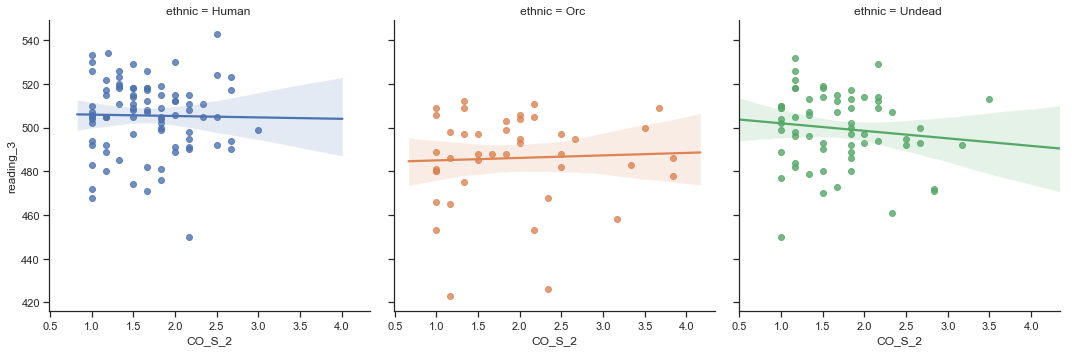

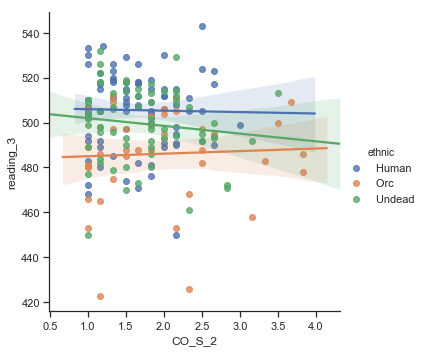

In [4]:
#----------------------------------------------------------------------------#
# ~~plot
# python seaborn
sns.lmplot(x='CO_S_2', y='reading_3', hue='ethnic',col='ethnic', data=df)
sns.lmplot(x='CO_S_2', y='reading_3', hue='ethnic',data=df)
plt.show()

In [5]:
#----------------------------------------------------------------------------#
# ~~homogeneity
# python要先把data做分組才能一組一組看變異數同質性(這裡暫時assign成df2做同質性檢定)
#freq_count
print('--------------------homogeneity-----------------------')
df2=df
df2['ethnic']=df2['ethnic'].str.replace('Human','1')
df2['ethnic']=df2['ethnic'].str.replace('Orc','2')
df2['ethnic']=df2['ethnic'].str.replace('Undead','3')
#convert data type
df2['ethnic']=df2['ethnic'].astype(int)
#group data
df2=df2[['ethnic','reading_3']]
df2=df2.groupby(['ethnic'])

df2_human = df2.get_group(1)
df2_orc = df2.get_group(2)
df2_undead = df2.get_group(3)

print(stats.bartlett(df2_human['reading_3'],df2_orc['reading_3'], df2_undead['reading_3']))
print(stats.levene(df2_human['reading_3'],df2_orc['reading_3'],df2_undead['reading_3']))

--------------------homogeneity-----------------------
BartlettResult(statistic=3.39757749980998, pvalue=0.1829049335526695)
LeveneResult(statistic=0.579736693646694, pvalue=0.5610333441234336)


C:\Users\johnson_yang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\johnson_yang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\johnson_yang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [6]:
#----------------------------------------------------------------------------#

# ~~ANCOVA

# R packages

print('---------------------ANCOVA----------------------------')
rr('acov.op <-aov(reading_3 ~ CO_S_2+ethnic, data=acov)')
print(rr('summary(acov.op)'))
print('-------------------------------------------------------')

# python

#anc_results=pi.ancova(data=df, dv='reading_3', covar='CO_S_2', between='ethnic')
#print(anc_results)

---------------------ANCOVA----------------------------
             Df Sum Sq Mean Sq F value   Pr(>F)    

CO_S_2        1    509     509   1.624    0.204    

ethnic        2  10293    5146  16.433 2.63e-07 ***

Residuals   189  59189     313                     

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

-------------------------------------------------------


In [7]:
# ~~original mean
print('------------------original mean-------------------------')
print('ethnic reading_3')
print(' Human',df2_human['reading_3'].mean())
print('   Orc',df2_orc['reading_3'].mean())
print('Undead',df2_undead['reading_3'].mean())
print('-------------------------------------------------------')

------------------original mean-------------------------
ethnic reading_3
 Human 505.5287356321839
   Orc 486.04761904761904
Undead 499.609375
-------------------------------------------------------


In [8]:
# ~~effect
# R packages
print('--------------------effect-------------------------')
rr('install.packages("effects")')
rr('library(effects)')
rr('adj.mean<-effect("ethnic",acov.op)')
print(rr('data.frame(adj.mean)'))

--------------------effect-------------------------
   ethnic      fit       se    lower    upper

1  Human  505.4801 1.901756 501.7287 509.2315

2    Orc  486.1919 2.757910 480.7516 491.6321

3 Undead  499.5808 2.213402 495.2147 503.9470



In [9]:
# ~~post-hoc
# R packages
rr('install.packages("multcomp")')
rr('library(multcomp)')
rr('posthoc<-glht(acov.op, linfct=mcp(ethnic="Tukey"))')
print(rr('summary(posthoc)'))

# python

#pi_post=pi.pairwise_tukey(dv='reading_3',between='ethnic', data=df,alpha=0.05, tail='two-sided', effsize='cohen')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(pi_post)



	 Simultaneous Tests for General Linear Hypotheses



Multiple Comparisons of Means: Tukey Contrasts





Fit: aov(formula = reading_3 ~ CO_S_2 + ethnic, data = acov)



Linear Hypotheses:

                      Estimate Std. Error t value Pr(>|t|)    

Orc  - Human  == 0     -19.288      3.365  -5.732  < 1e-04 ***

Undead  - Human  == 0   -5.899      2.915  -2.024 0.108439    

Undead  - Orc  == 0     13.389      3.545   3.777 0.000591 ***

---

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Adjusted p values reported -- single-step method)





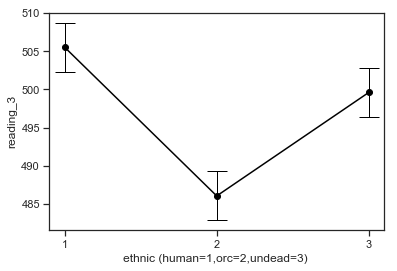

In [10]:
# ~~plot2
plt.errorbar([1,2,3],[np.mean(np.array(df2_human['reading_3']).astype(np.float)),np.mean(np.array(df2_orc['reading_3']).astype(np.float)),np.mean(np.array(df2_undead['reading_3']).astype(np.float))],yerr=3.2,fmt='-o',ecolor='black',color='black',elinewidth=1,capsize=10)
plt.xlabel(xlabel='ethnic (human=1,orc=2,undead=3) ')
plt.xticks(np.linspace(1, 3, 3))
plt.ylabel(ylabel='reading_3')
plt.show()

In [11]:
# ~~eta squared
# R packages
rr('install.packages("lsr")')
rr('library(lsr)')
print(rr('etaSquared(acov.op)'))

             eta.sq  eta.sq.part

CO_S_2 0.0006221673 0.0007351627

ethnic 0.1470558313 0.1481323974

